In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use("default")
%matplotlib inline


In [29]:
df = pd.read_csv(r"F:\Git_Projects\layoffs-dashboard\data\layoffs.csv")
df.head(5)

,company,location,total_laid_off,date,percentage_laid_off,industry,source,stage,funds_raised,country,date_added
0,Sapiens,"Tel Aviv, Non-U.S.",700.0,12/28/2025,0.15,Finance,https://www.calcalistech.com/ctechnews/article...,Acquired,88.0,Israel,12/31/2025
1,Yellow.ai,SF Bay Area,100.0,12/23/2025,0.30,Support,https://inc42.com/buzz/exclusive-yellow-ai-lay...,Series C,102.0,United States,12/26/2025
2,The Trade Desk,Los Angeles,NaN,12/17/2025,NaN,Marketing,https://www.adexchanger.com/platforms/the-trad...,Post-IPO,257.0,United States,12/19/2025
3,Amazon,Seattle,84.0,12/15/2025,NaN,Retail,https://www.bizjournals.com/seattle/news/2025/...,Post-IPO,8100.0,United States,12/19/2025
4,PowerSchool,Sacramento,NaN,12/12/2025,NaN,Education,https://www.bizjournals.com/sacramento/news/20...,Acquired,31.0,United States,12/15/2025


In [30]:
df.shape

(4253, 11)

In [31]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4253 entries, 0 to 4252
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              4253 non-null   object 
 1   location             4252 non-null   object 
 2   total_laid_off       2782 non-null   float64
 3   date                 4253 non-null   object 
 4   percentage_laid_off  2689 non-null   float64
 5   industry             4251 non-null   object 
 6   source               4250 non-null   object 
 7   stage                4248 non-null   object 
 8   funds_raised         3771 non-null   float64
 9   country              4251 non-null   object 
 10  date_added           4253 non-null   object 
dtypes: float64(3), object(8)
memory usage: 365.6+ KB


In [32]:
df = df.drop(columns=['source', 'date_added','percentage_laid_off','location'])


In [33]:
df.isnull().sum().sort_values(ascending=False)


total_laid_off    1471
funds_raised       482
stage                5
industry             2
country              2
date                 0
company              0
dtype: int64

In [34]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.to_period('M').astype(str)


In [35]:
df_clean = df.dropna(subset=['total_laid_off'])
df_clean.shape


(2782, 9)

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2782 entries, 0 to 4252
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   company         2782 non-null   object        
 1   total_laid_off  2782 non-null   float64       
 2   date            2782 non-null   datetime64[ns]
 3   industry        2781 non-null   object        
 4   stage           2781 non-null   object        
 5   funds_raised    2502 non-null   float64       
 6   country         2781 non-null   object        
 7   year            2782 non-null   int32         
 8   month           2782 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(5)
memory usage: 206.5+ KB


In [39]:
df_clean['industry'].value_counts()

industry
Finance           335
Retail            227
Healthcare        206
Consumer          181
Other             180
Transportation    179
Food              157
Marketing         144
Education         107
Media             103
Security          100
Real Estate        95
Crypto             90
Data               81
HR                 74
Travel             72
Sales              57
Hardware           51
Logistics          49
Support            43
Recruiting         43
Infrastructure     40
Product            34
Fitness            30
Energy             27
Manufacturing      19
AI                 17
Aerospace          15
Legal              13
Construction       12
Name: count, dtype: int64

In [38]:
df_clean['country'].value_counts()

country
United States           1712
India                    257
Canada                   126
Israel                   117
Germany                   93
United Kingdom            80
Brazil                    75
Australia                 47
Sweden                    30
Singapore                 30
Indonesia                 21
Nigeria                   19
Netherlands               18
China                     14
France                    14
Ireland                   12
Estonia                    9
Kenya                      8
Denmark                    8
Spain                      7
Norway                     6
Austria                    6
Poland                     5
Argentina                  5
New Zealand                5
Mexico                     4
Chile                      4
Japan                      4
United Arab Emirates       4
Uruguay                    3
Portugal                   3
Switzerland                3
Hong Kong                  3
Colombia                   2
Malays

In [19]:
df_clean['total_laid_off'].describe()


count     2782.000000
mean       288.667505
std       1002.412193
min          3.000000
25%         40.000000
50%         87.500000
75%        200.000000
max      22000.000000
Name: total_laid_off, dtype: float64

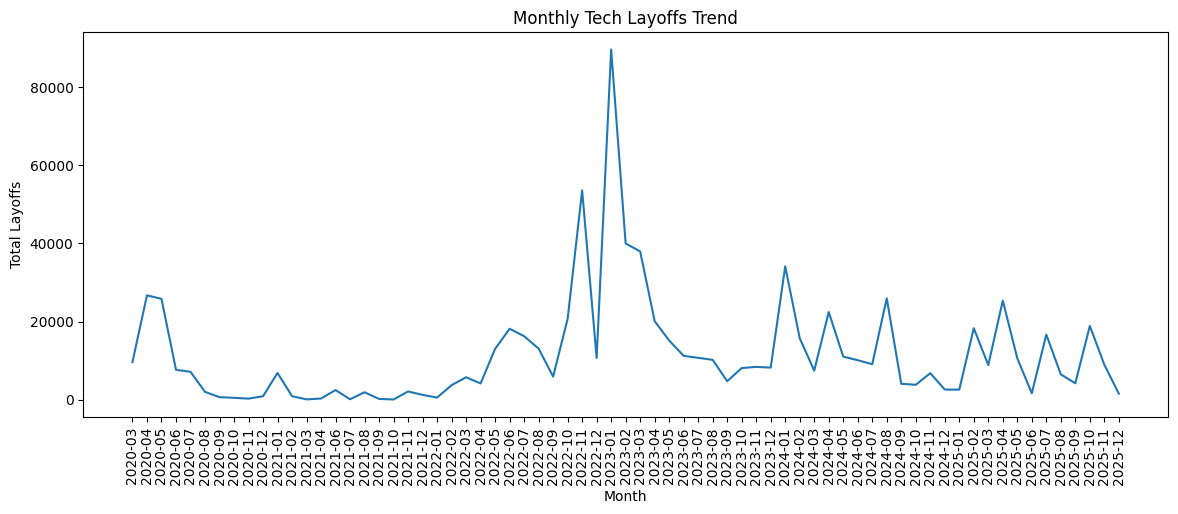

In [20]:
monthly_layoffs = (
    df_clean
    .groupby('month')['total_laid_off']
    .sum()
    .reset_index()
)

plt.figure(figsize=(14,5))
plt.plot(monthly_layoffs['month'], monthly_layoffs['total_laid_off'])
plt.xticks(rotation=90)
plt.title("Monthly Tech Layoffs Trend")
plt.xlabel("Month")
plt.ylabel("Total Layoffs")
plt.show()


In [21]:
industry_layoffs = (
    df_clean
    .groupby('industry')['total_laid_off']
    .sum()
    .sort_values(ascending=False)
)

industry_layoffs.head(10)


industry
Hardware          93207.0
Retail            88295.0
Other             85035.0
Consumer          80810.0
Transportation    65451.0
Finance           53719.0
Food              50811.0
Healthcare        38904.0
Travel            23370.0
Sales             21193.0
Name: total_laid_off, dtype: float64

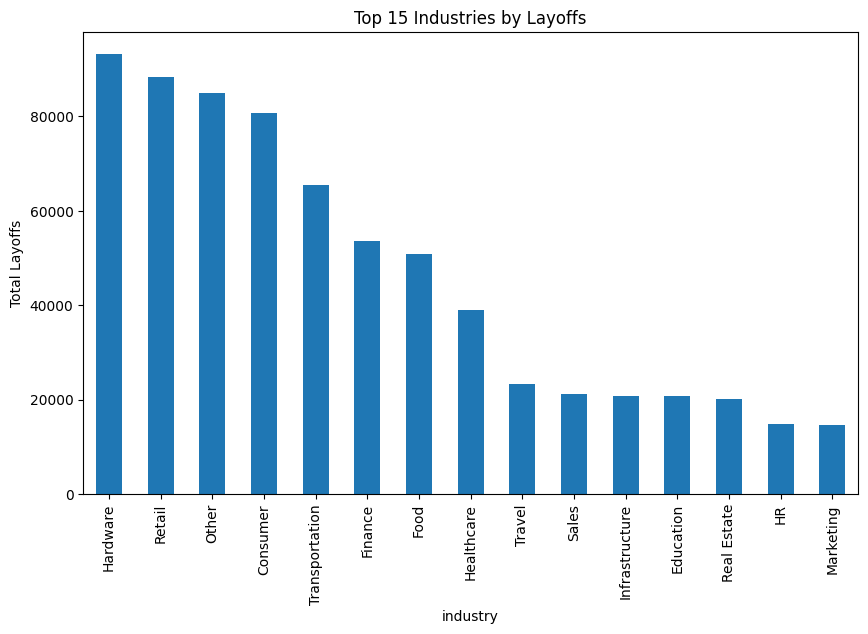

In [22]:
plt.figure(figsize=(10,6))
industry_layoffs.head(15).plot(kind='bar')
plt.title("Top 15 Industries by Layoffs")
plt.ylabel("Total Layoffs")
plt.show()


In [44]:
country_company_layoffs = (
    df_clean
    .groupby(['country', 'company'])['total_laid_off']
    .sum()
    .reset_index()
)

top_company_per_country = (
    country_company_layoffs
    .loc[
        country_company_layoffs
        .groupby('country')['total_laid_off']
        .idxmax()
    ]
    .sort_values('total_laid_off', ascending=False)
)

top_company_per_country.head(10)


,country,company,total_laid_off
1332,United States,Intel,43115.0
295,Germany,SAP,11000.0
643,Netherlands,Philips,10000.0
720,Sweden,Ericsson,8500.0
766,United Kingdom,Getir,5800.0
341,India,Byju's,5500.0
621,Japan,Toshiba,4000.0
177,Canada,Shopify,3450.0
209,China,Bytedance,2950.0
690,Singapore,Crypto.com,2260.0


In [46]:
df_clean[df_clean["company"]=="Intel"]

,company,total_laid_off,date,industry,stage,funds_raised,country,year,month
140,Intel,5000.0,2025-07-11,Hardware,Post-IPO,12.0,United States,2025,2025-07
204,Intel,22000.0,2025-04-23,Hardware,Post-IPO,12.0,United States,2025,2025-04
288,Intel,58.0,2025-02-04,Hardware,Post-IPO,12.0,United States,2025,2025-02
519,Intel,15000.0,2024-08-01,Hardware,Post-IPO,12.0,United States,2024,2024-08
695,Intel,62.0,2024-04-09,Hardware,Post-IPO,12.0,United States,2024,2024-04
961,Intel,311.0,2023-12-21,Hardware,Post-IPO,12.0,United States,2023,2023-12
1280,Intel,140.0,2023-08-17,Hardware,Post-IPO,12.0,United States,2023,2023-08
2085,Intel,343.0,2023-01-30,Hardware,Post-IPO,12.0,United States,2023,2023-01
2444,Intel,201.0,2022-12-06,Hardware,Post-IPO,12.0,United States,2022,2022-12


In [47]:
top_company_per_country

,country,company,total_laid_off
1332,United States,Intel,43115.0
295,Germany,SAP,11000.0
643,Netherlands,Philips,10000.0
720,Sweden,Ericsson,8500.0
766,United Kingdom,Getir,5800.0
341,India,Byju's,5500.0
621,Japan,Toshiba,4000.0
177,Canada,Shopify,3450.0
209,China,Bytedance,2950.0
690,Singapore,Crypto.com,2260.0


In [50]:
company_layoffs = (
    df_clean
    .groupby('company')['total_laid_off']
    .sum()
    .sort_values(ascending=False)
)

company_layoffs.head(10)


company
Intel         43115.0
Amazon        42024.0
Microsoft     30055.0
Meta          25300.0
Salesforce    16525.0
Cisco         14521.0
Tesla         14500.0
Google        13697.0
Dell          12650.0
SAP           11000.0
Name: total_laid_off, dtype: float64

In [52]:
# Step 1: Top companies overall
top_companies = (
    df_clean
    .groupby('company')['total_laid_off']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Step 2: Country-wise breakup for those companies
company_country_layoffs = (
    df_clean[df_clean['company'].isin(top_companies)]
    .groupby(['company', 'country'])['total_laid_off']
    .sum()
    .reset_index()
    .sort_values(['company', 'total_laid_off'], ascending=[True, False])
)

company_country_layoffs


,company,country,total_laid_off
0,Amazon,United States,42024.0
1,Cisco,United States,14521.0
2,Dell,United States,12650.0
3,Google,United States,13697.0
4,Intel,United States,43115.0
5,Meta,United States,25300.0
6,Microsoft,United States,30055.0
7,SAP,Germany,11000.0
9,Salesforce,United States,16475.0
8,Salesforce,Ireland,50.0


In [41]:
country_layoffs = (
    df_clean
    .groupby('country')['total_laid_off']
    .sum()
    .sort_values(ascending=False)
)

country_layoffs.head(10)


country
United States     557229.0
India              63824.0
Germany            31438.0
United Kingdom     21972.0
Netherlands        19875.0
Sweden             18544.0
Canada             15787.0
Brazil             11423.0
Israel             11373.0
China               8190.0
Name: total_laid_off, dtype: float64

,company,country,total_laid_off
0,Amazon,United States,42024.0
1,Cisco,United States,14521.0
2,Dell,United States,12650.0
3,Google,United States,13697.0
4,Intel,United States,43115.0
5,Meta,United States,25300.0
6,Microsoft,United States,30055.0
7,SAP,Germany,11000.0
9,Salesforce,United States,16475.0
8,Salesforce,Ireland,50.0


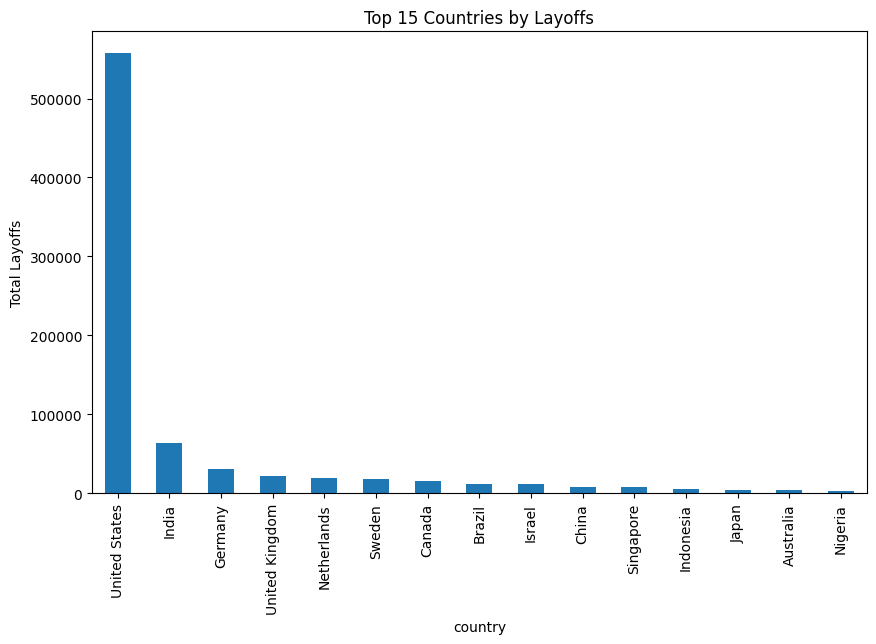

In [24]:
plt.figure(figsize=(10,6))
country_layoffs.head(15).plot(kind='bar')
plt.title("Top 15 Countries by Layoffs")
plt.ylabel("Total Layoffs")
plt.show()


In [25]:
stage_layoffs = (
    df_clean
    .groupby('stage')['total_laid_off']
    .sum()
    .sort_values(ascending=False)
)

stage_layoffs


stage
Post-IPO          479170.0
Unknown            76289.0
Acquired           70341.0
Series B           30572.0
Series C           27353.0
Series D           26999.0
Series E           24548.0
Series F           15151.0
Private Equity     12226.0
Series A            8932.0
Series H            8497.0
Subsidiary          7538.0
Series G            5039.0
Series J            4700.0
Series I            3155.0
Seed                2531.0
Name: total_laid_off, dtype: float64

In [26]:
df_funding = df_clean.dropna(subset=['funds_raised'])

df_funding[['funds_raised', 'total_laid_off']].corr()


,funds_raised,total_laid_off
funds_raised,1.000000,0.105213
total_laid_off,0.105213,1.000000


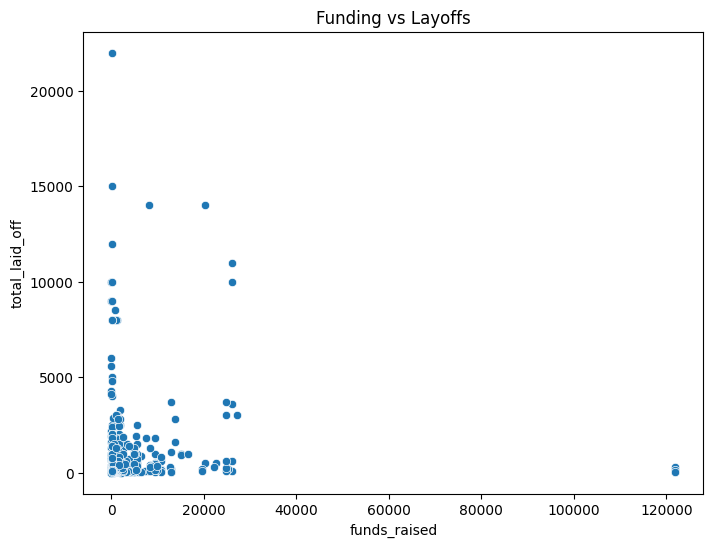

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_funding,
    x='funds_raised',
    y='total_laid_off'
)
plt.title("Funding vs Layoffs")
plt.show()
